### Credit Card Fraud Detection And Checking Accuracy Of Different Models Project

Importing dependencies

In [6]:
#data preprocessing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sklearn-genetic

#genetic algorithm
from genetic_selection import GeneticSelectionCV
#machine learning dependencies
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from genetic_selection import GeneticSelectionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the data

In [8]:
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
print(f"No. of rows in the dataset ==>> {df.shape[0]}")
print(f"No. of columns in the dataset ==>> {df.shape[1]}")

No. of rows in the dataset ==>> 284807
No. of columns in the dataset ==>> 31


Loading first 3 rows of the dataset

In [9]:
df.head(n=3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [10]:
print("the name of the columns in the dataset are : ")
df.columns

the name of the columns in the dataset are : 


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

dropping time column

In [11]:
df.drop(["Time"],axis=1,inplace=True)

In [12]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [13]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
df_fraud=df[df.Class==1]
df_true=df[df.Class==0]
df_true=df_true.sample(frac=0.5)
data=pd.concat([df_true,df_fraud])
data = data.reset_index(drop=True)
data.shape

(142650, 30)

In [15]:
data['Amount'].describe()

count    142650.000000
mean         88.328247
std         250.281392
min           0.000000
25%           5.600000
50%          22.000000
75%          76.970000
max       25691.160000
Name: Amount, dtype: float64

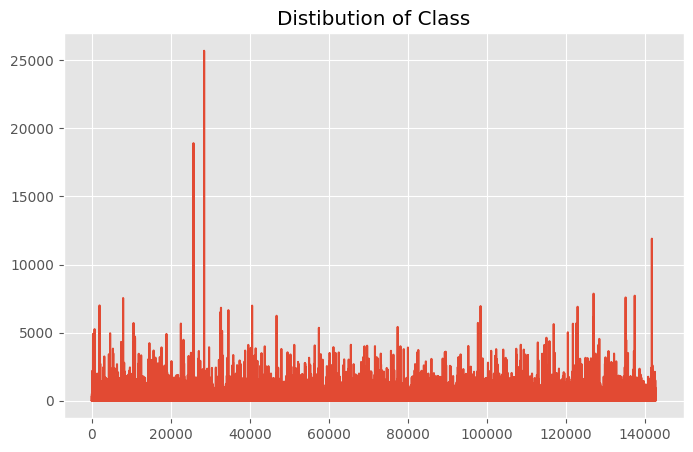

In [16]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    plt.plot(data["Amount"])
    plt.show()

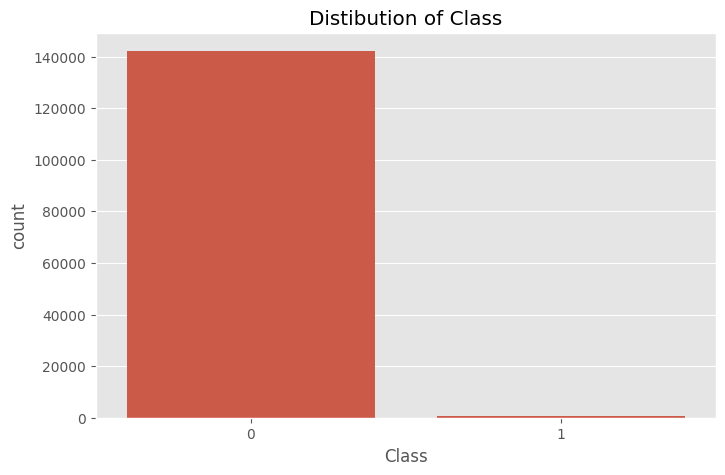

In [17]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    sns.countplot(data=data,x=data["Class"])
    plt.show()

what is the precentage of fraud transactions ?

In [18]:
fraud_per=round((len(df[df.Class==1])/len(df[df.Class==0]))*100,2)
print(f"The percentage of fraud transactions is {fraud_per} %")

The percentage of fraud transactions is 0.17 %


scaling the Amount column with standard scaling process

In [19]:
sc=StandardScaler()
data.Amount=sc.fit_transform(data.Amount.values.reshape(-1,1))

Amount column after transformation

In [20]:
data.Amount

0        -0.268292
1        -0.228656
2        -0.312962
3        -0.337015
4         0.186158
            ...   
142645    1.205335
142646   -0.349880
142647   -0.041706
142648    0.625985
142649   -0.182988
Name: Amount, Length: 142650, dtype: float64

Dropping duplicate columns

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.shape

(139596, 30)

Train- Test Split

In [23]:
x=data.drop(["Class"],axis=1)
y=data["Class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

LogisticRegression

In [24]:
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_pred_log=model_log.predict(x_test)
print(f"The accuracy of the model is {round(model_log.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.86%


F1 Score -Logistic Regression

In [25]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_log),2)}")

F1-Score of the model is 0.79


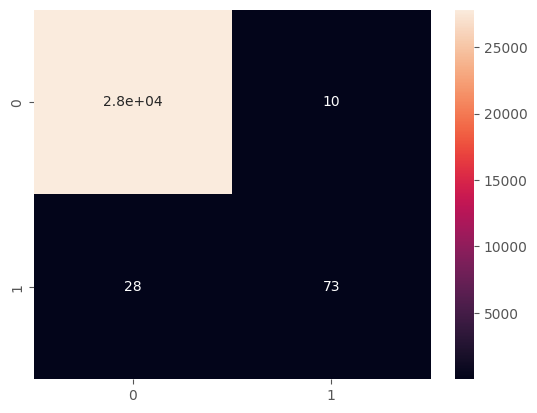

In [26]:
with plt.style.context(('ggplot')):
    sns.heatmap(confusion_matrix(y_test,y_pred_log),annot=True)

### Random Forest Classifier

In [27]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred_random=model.predict(x_test)

In [28]:
print(f"The accuracy of the model is {round(model.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.91%


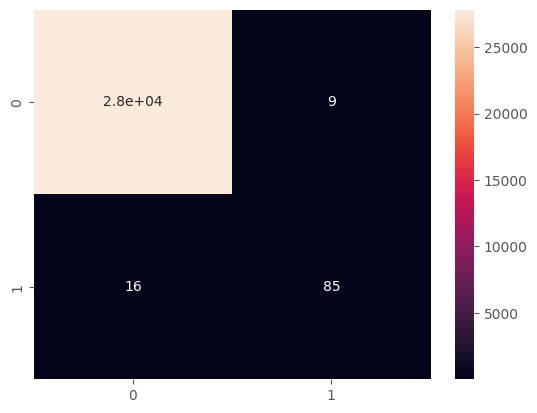

In [29]:
with plt.style.context(('ggplot')):
    sns.heatmap(confusion_matrix(y_test,y_pred_random),annot=True)

F1-Score (Random Forest)

In [30]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_random),2)}")

F1-Score of the model is 0.87


### Using Genetic Algorithm with LogisticRegression

In [31]:
estimator_log=LogisticRegression()
model_ga_log=GeneticSelectionCV(estimator=estimator_log,cv=5,scoring='accuracy',max_features=5,n_population=60,n_gen_no_change=6)
model_ga_log.fit(x_train,y_train)
y_log_ga=model_ga_log.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


In [32]:
print(f"The accuracy of the model is {round(model_ga_log.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.82%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


F1-Score (GA + LogisticRegression)

In [33]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_log_ga),2)}")

F1-Score of the model is 0.72


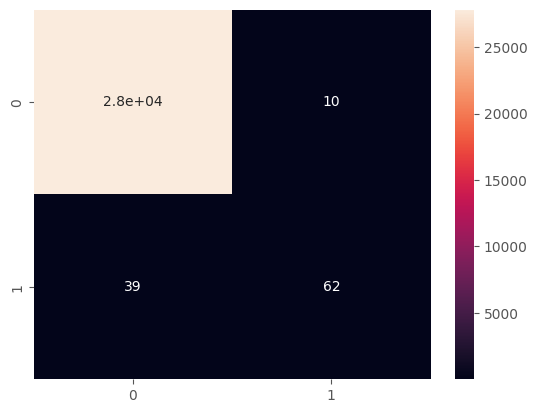

In [34]:
with plt.style.context(('ggplot')):
    sns.heatmap(confusion_matrix(y_test,y_log_ga),annot=True)

Applying Xgboost Model

In [35]:
model_xgb=XGBClassifier(max_depth=2)
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)

In [36]:
print(f"The accuracy of the model is {round(model_xgb.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.92%


In [37]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_xgb),2)}")

F1-Score of the model is 0.89


Generating ROC-AUC Curve

Calculating ROC-AUC for XGBoost Model

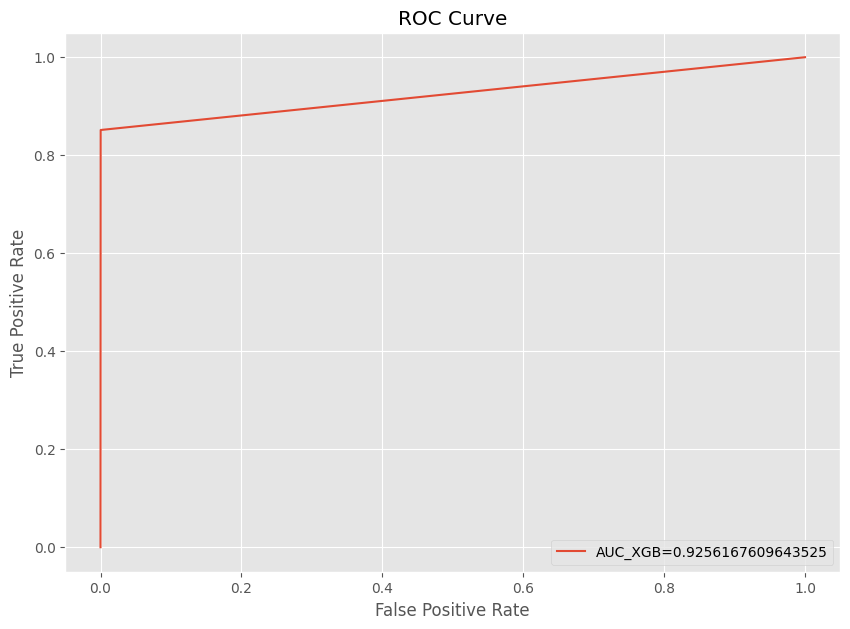

In [38]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_xgb)
auc = metrics.roc_auc_score(y_test, y_pred_xgb)

#create ROC curve
with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,7))
    plt.title("ROC Curve")
    plt.plot(fpr,tpr,label="AUC_XGB="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

### Checking performance of the all the models

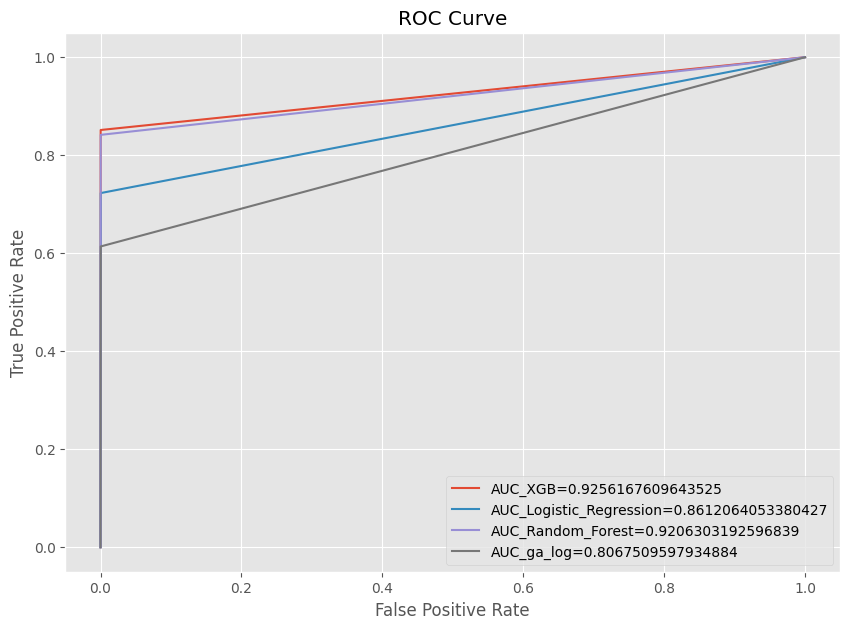

In [39]:
#xgbbost
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb)
#logistic-regression
fpr_log, tpr_log, _ = metrics.roc_curve(y_test,  y_pred_log)
auc_log = metrics.roc_auc_score(y_test, y_pred_log)
#random-forest
fpr_rand, tpr_rand, _ = metrics.roc_curve(y_test,  y_pred_random)
auc_rand = metrics.roc_auc_score(y_test, y_pred_random)
#ga+logistic
fpr_log_ga, tpr_log_ga, _ = metrics.roc_curve(y_test,  y_log_ga)
auc_log_ga = metrics.roc_auc_score(y_test, y_log_ga)


with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,7))
    plt.title("ROC Curve")
    plt.plot(fpr_xgb,tpr_xgb,label="AUC_XGB="+str(auc_xgb))
    plt.plot(fpr_log,tpr_log,label="AUC_Logistic_Regression="+str(auc_log))
    plt.plot(fpr_rand,tpr_rand,label="AUC_Random_Forest="+str(auc_rand))
    plt.plot(fpr_log_ga,tpr_log_ga,label="AUC_ga_log="+str(auc_log_ga))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()


